## EDA

### Librerías

In [18]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

### Configuraciones

In [19]:
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

### Carga de datos

In [20]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\nuevo-proyecto\data\dataset_limpio.csv")

In [21]:
df.head(2) #Comprobamos que el dataframe se ha cargado correctamente

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,magSource,año,mes,dia,hora,dia_semana,fecha,minuto,mag_obj,depth_obj
0,2025-05-02 02:50:02.380,33.912167,-117.070000,12.69,0.89,ml,33.0,116.0,Sin datos,0.20,...,ci,2025,5,2,2,Friday,2025-05-02,50,Bajo,Superficial
1,2025-05-02 02:39:31.940,33.073667,-116.801333,9.34,0.82,ml,5.0,168.0,0.1396,0.15,...,ci,2025,5,2,2,Friday,2025-05-02,39,Bajo,Superficial


In [22]:
df.isnull().sum() #comprobamos si hay valores nulos en el dataframe

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              0
nst                  0
gap                  0
dmin                 0
rms                  0
net                  0
id                   0
updated              0
place                0
type                 0
horizontalError      0
depthError           0
magError             0
magNst               0
status               0
locationSource       0
magSource            0
año                  0
mes                  0
dia                  0
hora                 0
dia_semana           0
fecha                0
minuto               0
mag_obj            637
depth_obj          372
dtype: int64

#### Distribución de tipos de eventos sísmicos

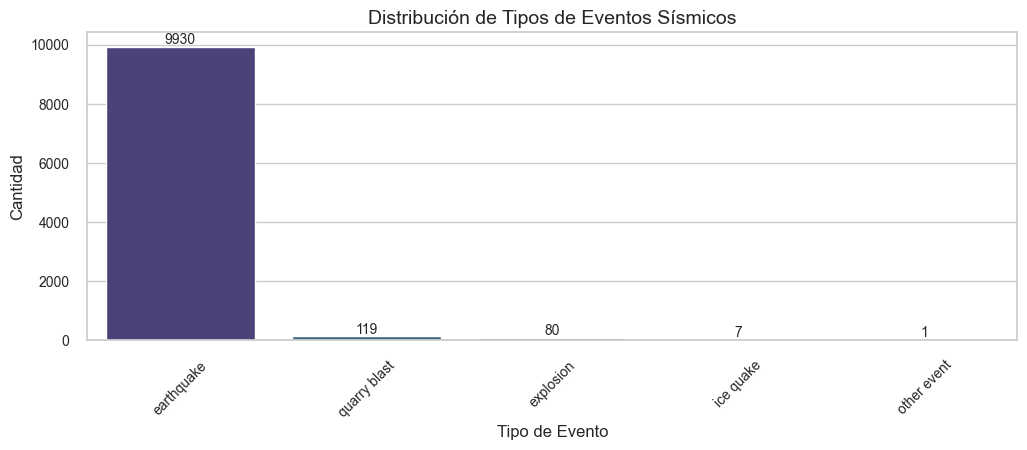

In [23]:
# Contamos los tipos de eventos sísmicos
event_counts = df['type'].value_counts()

# Creamos el gráfico de barras
ax = sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')

# Añadimos etiquetas con los valores en cada barra
for i, value in enumerate(event_counts.values):
    ax.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Configuramos el gráfico
plt.title('Distribución de Tipos de Eventos Sísmicos')
plt.xlabel('Tipo de Evento')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [24]:
"""Este histograma de frecuencias muestra la distribución de los tipos de eventos sísmicos del dataset.

Distribución: 
    ·Earthquake es, con gran diferencia, el tipo más común, con casi 10,000 eventos.
    ·Otros tipos como quarry blast, explosion, ice quake, y other event tienen frecuencias significativamente menores, casi insignificantes en comparación.

Conclusiones:
    1.Predominio de los Terremotos:
    Los terremotos (earthquakes) son, con diferencia, el tipo de evento sísmico más común, con 9930 registros, representando más del 99% del total.

    2.Eventos Minoritarios:
    Los otros tipos de eventos, como quarry blast (119), explosion (80), ice quake (7) y other event (1), tienen frecuencias significativamente más bajas, lo que sugiere que son mucho menos frecuentes o menos detectados.

    3.Desbalance en la Clasificación:
    La enorme diferencia en la cantidad de terremotos frente a otros tipos de eventos puede reflejar un sesgo en los datos, probablemente debido a que las redes sísmicas están optimizadas para detectar terremotos.

    4.Posible Subrepresentación:
    Algunos tipos como ice quake y other event parecen estar subrepresentados, lo que podría estar relacionado con la ubicación geográfica o la sensibilidad de los sensores.

    5.Importancia de los Datos Contextuales:
    Para comprender mejor esta distribución, sería importante considerar factores como la región de muestreo, la profundidad y la energía liberada por cada tipo de evento.#





_IncompleteInputError: incomplete input (484427460.py, line 1)

#### Comparación de magnitud por tipos de evento sísmico

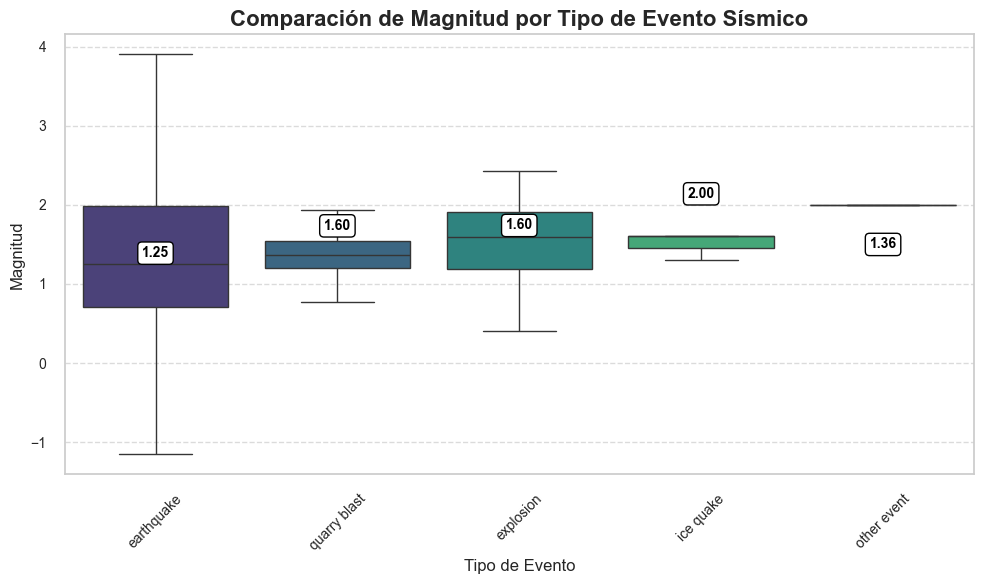

In [ ]:
# Creamos un gráfico de caja para comparar la magnitud por tipo de evento sísmico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='mag', palette='viridis', showfliers=False, linewidth=1)

# Añadimos etiquetas con la mediana en cada caja con un recuadro
medians = df.groupby('type')['mag'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.05, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Configuramos el gráfico
plt.title('Comparación de Magnitud por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Comparación de profundidad por tipo de evento sísmico

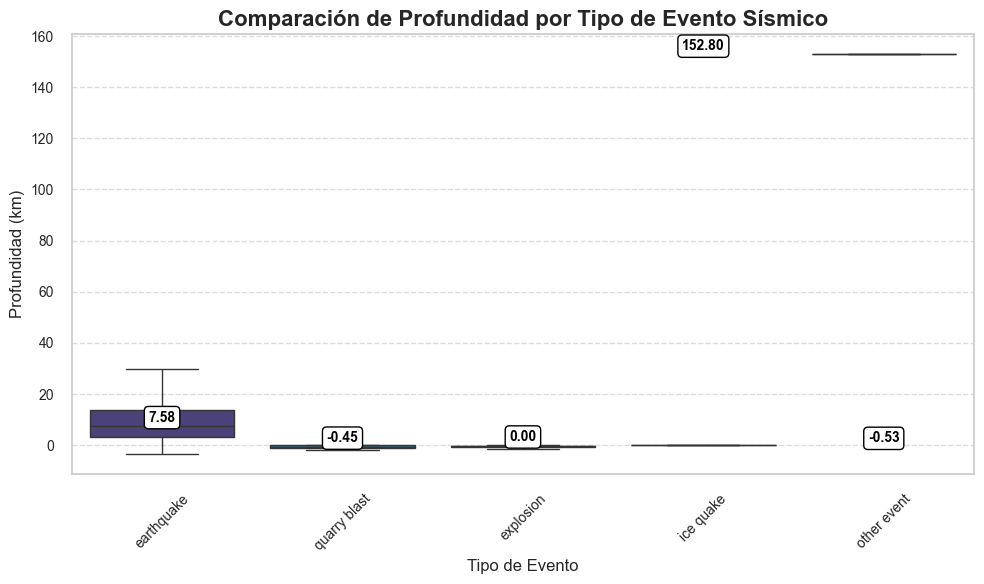

In [ ]:
# Creamos un gráfico de caja para mostrar la comparación de profundidad por tipo de evento sísmico
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='type', y='depth', palette='viridis', showfliers=False, linewidth=1)

# Añadimos etiquetas con la mediana en cada caja con un recuadro
medians = df.groupby('type')['depth'].median()
for i, median in enumerate(medians):
    ax.text(i, median + 0.5, f'{median:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Configuramos el gráfico
plt.title('Comparación de Profundidad por Tipo de Evento Sísmico', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Profundidad (km)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Distribución de magnitud por tipo de evento sísmico

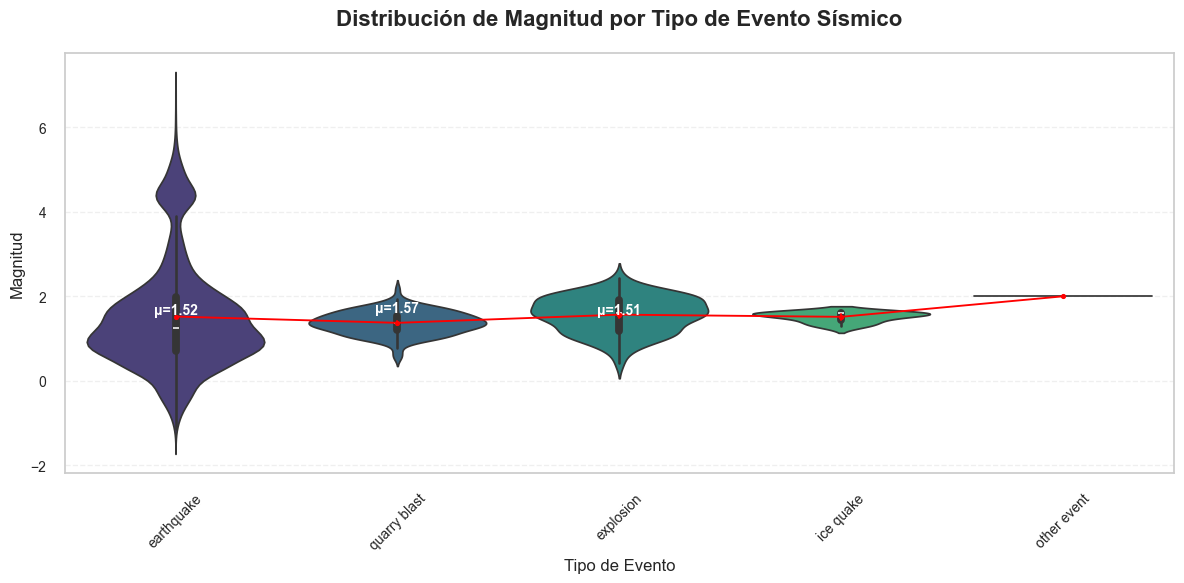

In [31]:
# Creamos un violin plot para mostrar la distribución de magnitud por tipo de evento
plt.figure(figsize=(12, 6))
ax = sns.violinplot(data=df, x='type', y='mag', palette='viridis')

# Añadimos puntos para mostrar la media
sns.pointplot(data=df, x='type', y='mag', color='red', markers='o', scale=0.5)

# Añadimos etiquetas con los valores promedio
means = df.groupby('type')['mag'].mean()
for i, mean_val in enumerate(means):
    ax.text(i, mean_val, f'μ={mean_val:.2f}', ha='center', va='bottom', 
            color='white', fontweight='bold', fontsize=10)

# Configuramos el gráfico
plt.title('Distribución de Magnitud por Tipo de Evento Sísmico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Evento', fontsize=12)
plt.ylabel('Magnitud', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### Distribución de profundidad por tipo de evento sísmico

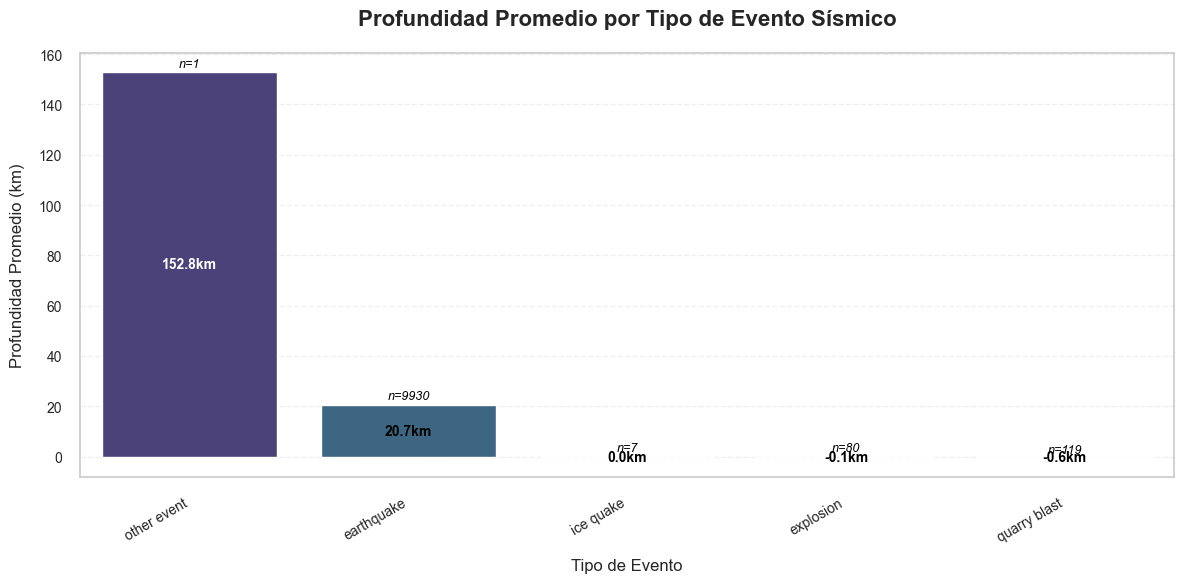

In [27]:
# Creamos un gráfico de barras para mostrar la distribución promedio de profundidad por tipo de evento sísmico
plt.figure(figsize=(12, 6))
mean_depths = df.groupby('type')['depth'].mean().sort_values(ascending=False)
ax = sns.barplot(x=mean_depths.index, y=mean_depths.values, palette='viridis')

# Añadimos etiquetas con los valores promedio en cada barra
for i, value in enumerate(mean_depths.values):
    color = 'white' if value > 75 else 'black'  # Color del texto adaptativo
    ax.text(i, value/2, f'{value:.1f}km', ha='center', va='center', 
            fontsize=10, color=color, fontweight='bold')

# Añadimos el número de eventos en la parte superior
for i, (event_type, depth) in enumerate(mean_depths.items()):
    count = len(df[df['type'] == event_type])
    ax.text(i, depth + 1, f'n={count}', ha='center', va='bottom', 
            fontsize=9, color='black', style='italic')

# Mejoramos el aspecto del gráfico
plt.title('Profundidad Promedio por Tipo de Evento Sísmico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Tipo de Evento', fontsize=12, labelpad=10)
plt.ylabel('Profundidad Promedio (km)', fontsize=12, labelpad=10)
plt.xticks(rotation=30, ha='right')

# Añadimos una cuadrícula más sutil
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Ajustamos los márgenes
plt.tight_layout()

plt.show()

#### Relación entre magnitud y profundidad por tipo de evento sísmico

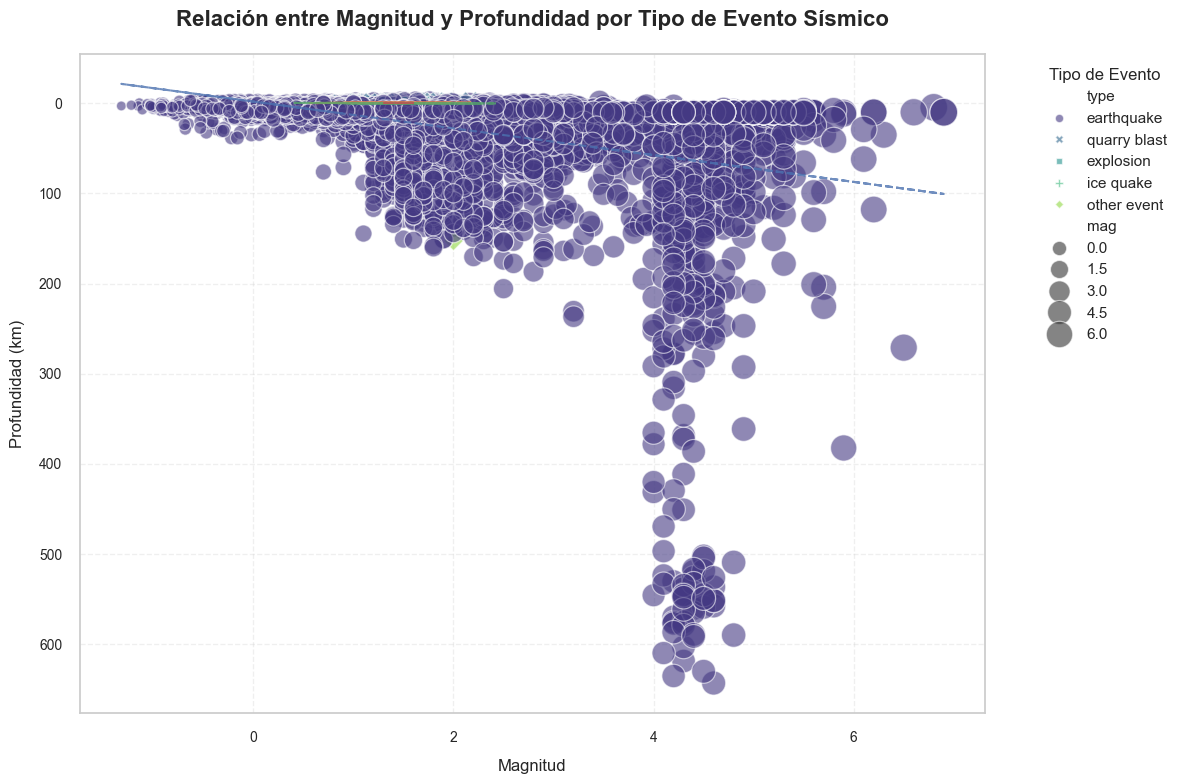

In [35]:
# Creamos la figura
plt.figure(figsize=(12, 8))

# Creamos el scatter plot con mejores características visuales
scatter = sns.scatterplot(
    data=df,
    x='mag',
    y='depth',
    hue='type',
    style='type',
    size='mag',
    sizes=(50, 400),
    alpha=0.6,
    palette='viridis'
)

# Añadimos líneas de tendencia para cada tipo
for event_type in df['type'].unique():
    mask = df['type'] == event_type
    z = np.polyfit(df[mask]['mag'], df[mask]['depth'], 1)
    p = np.poly1d(z)
    plt.plot(df[mask]['mag'], p(df[mask]['mag']), '--', alpha=0.8)

# Mejoramos el aspecto del gráfico
plt.title('Relación entre Magnitud y Profundidad por Tipo de Evento Sísmico', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Magnitud', fontsize=12, labelpad=10)
plt.ylabel('Profundidad (km)', fontsize=12, labelpad=10)

# Ajustamos la leyenda
plt.legend(title='Tipo de Evento', title_fontsize=12, 
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadimos grid
plt.grid(True, linestyle='--', alpha=0.3)

# Invertimos el eje Y para que la profundidad aumente hacia abajo
plt.gca().invert_yaxis()

# Ajustamos los márgenes
plt.tight_layout()

plt.show()


#### Mapa de calor de los terremotos

In [38]:
# Create a base map centered on the mean coordinates
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=3)

# Prepare the data for the heatmap
heat_data = [[row['latitude'], row['longitude'], row['mag']] for index, row in df.iterrows()]

# Add the heatmap layer
HeatMap(heat_data, 
    radius=15,
    min_opacity=0.4,
    blur=15,
    max_zoom=1).add_to(m)

# Add a marker cluster layer to show individual earthquakes
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each earthquake with magnitude >= 3.0
for idx, row in df[df['mag'] >= 3.0].iterrows():
    folium.Marker(
    location=[row['latitude'], row['longitude']],
    popup=f"Magnitud: {row['mag']}<br>Profundidad: {row['depth']} km<br>Tipo: {row['type']}",
    icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
m

#### Conclusiones generales